<a href="https://colab.research.google.com/github/ShaktiMS/MLDL-expt-2/blob/main/Expt_2_Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('Life Expectancy Data.csv')

In [ ]:
df.columns = df.columns.str.strip() # Remove whitespace
df = df.drop(['Country', 'Year'], axis=1) # Drop identifiers
df.fillna(df.mean(numeric_only=True), inplace=True) # Handle Missing Values
df = pd.get_dummies(df, columns=['Status'], drop_first=True) # One-Hot Encoding

In [ ]:
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
alphas_to_test = np.logspace(-2, 2, 50) # 50 values between 0.01 and 100
ridge_cv = RidgeCV(alphas=alphas_to_test, cv=5)

In [ ]:
ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3.55648031e-01,
       4.29193426e-01, 5.17947468e-0...
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02]),
        cv=5)

In [ ]:
print(f"Optimal Alpha (Hyperparameter) found: {ridge_cv.alpha_:.5f}")
y_pred = ridge_cv.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Ridge RMSE: {rmse:.2f} years")
print(f"Ridge R² Score: {r2:.2f}")

Optimal Alpha (Hyperparameter) found: 0.01000
Ridge RMSE: 3.90 years
Ridge R² Score: 0.82


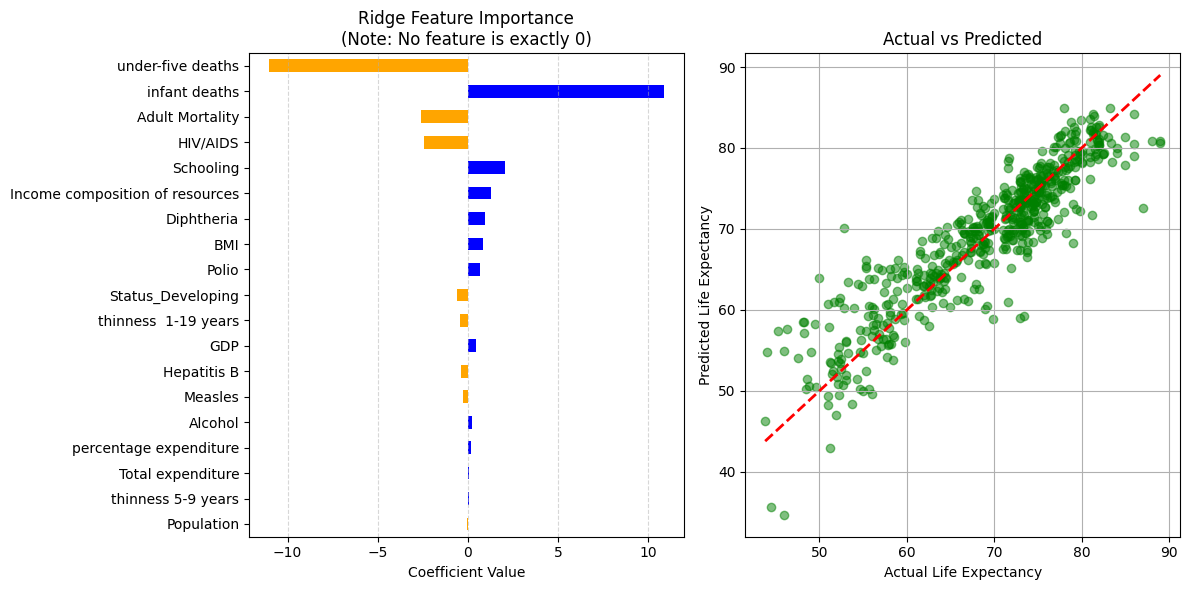


Top 5 Most Important Features (Ridge):
under-five deaths    11.044418
infant deaths        10.852937
Adult Mortality       2.591541
HIV/AIDS              2.420340
Schooling             2.060673
dtype: float64


In [ ]:
plt.figure(figsize=(12, 6))

coefs = pd.Series(ridge_cv.coef_, index=X.columns)
coefs_sorted = coefs.reindex(coefs.abs().sort_values(ascending=True).index)

plt.subplot(1, 2, 1)
coefs_sorted.plot(kind='barh', color=(coefs_sorted > 0).map({True: 'blue', False: 'orange'}))
plt.title(f"Ridge Feature Importance\n(Note: No feature is exactly 0)")
plt.xlabel("Coefficient Value")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted")
plt.grid(True)

plt.tight_layout()
plt.savefig('ridge_results.png')
plt.show()

print("\nTop 5 Most Important Features (Ridge):")
print(coefs.abs().sort_values(ascending=False).head(5))